In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing


df_wine = pd.read_csv('winequalityN.csv')

In [2]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df_wine.fillna(0.0,inplace=True)

In [4]:
df_wine.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_wine.iloc[:,1:-1], df_wine['type'], test_size= 0.3,random_state =42)

In [6]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3761,6.1,0.17,0.28,2.5,0.028,22.0,98.0,0.99072,3.16,0.37,11.1
3740,7.0,0.15,0.28,14.7,0.051,29.0,149.0,0.99792,2.96,0.39,9.0
1359,6.5,0.19,0.32,1.4,0.040,31.0,132.0,0.99220,3.36,0.54,10.8
1230,7.3,0.29,0.30,13.0,0.043,46.0,238.0,0.99860,3.06,0.41,8.7
4751,7.3,0.36,0.62,7.1,0.033,48.0,185.0,0.99472,3.14,0.62,10.6
...,...,...,...,...,...,...,...,...,...,...,...
3772,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6
5191,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1
5226,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7
5390,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4


In [7]:
X_train_scaled = preprocessing.scale(X_train)
print(X_train_scaled)

[[-8.37087008e-01 -1.02066263e+00 -2.70357745e-01 ... -2.44728110e-01
  -1.07351946e+00  5.00984611e-01]
 [-1.59921470e-01 -1.14060791e+00 -2.70357745e-01 ... -1.17332052e+00
  -9.42063380e-01 -1.25620580e+00]
 [-5.36124547e-01 -9.00717341e-01  3.66101599e-03 ...  6.83864301e-01
   4.38572417e-02  2.49957409e-01]
 ...
 [ 4.65547791e+00 -4.20936200e-01  2.05880172e+00 ... -2.44728110e-01
   8.98321781e-01 -6.70475665e-01]
 [ 1.26965022e+00  3.58708153e-01  1.30525013e+00 ...  4.98145819e-01
   2.41006673e+00  2.42552649e+00]
 [ 6.67725298e-01 -4.20936200e-01  2.09175087e-01 ...  3.38496134e-02
   6.35409615e-01 -8.47455271e-02]]


In [59]:
#build a function for decision tree
# def decTreeScore2(crit = 'gini',   minSamples = 1, minSplit = 2,max_features = 2):
#     dect = DecisionTreeClassifier(criterion = crit, min_samples_leaf = minSamples, 
#                                  min_samples_split = minSplit, random_state= 42)
#     dect.fit(X_train, y_train)
#     accuracy = accuracy_score(y_test, dect.predict(X_test))
#     print(accuracy)
#     return accuracy

In [60]:
# decTreeScore2()

0.9846153846153847


0.9846153846153847

In [10]:
# decTreeScore2(crit = 'entropy')

In [57]:
# use different maximum depth of the tree
# for i in np.arange(1,5, 1):
#     decTreeScore2(maxDepth = i)

0.92
0.9553846153846154
0.9666666666666667
0.98


In [12]:
# for i in np.arange(1, 2, 1):
#     decTreeScore2(minSamples = i)

In [13]:
# for i in np.arange(2,3,1):
#     decTreeScore2(minSplit = i)

In [14]:
# for i in np.arange(1,3,1):
#     decTreeScore2(max_features = i)

In [89]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 5, min_samples_leaf = 1, 
                                 min_samples_split = 2,max_features=2, random_state= 42) 
dt.fit(X_train, y_train) # train our model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [90]:
y_pred = dt.predict(X_test)
print(y_pred)

['white' 'white' 'white' ... 'red' 'white' 'red']


In [91]:
accuracy_score(y_test, y_pred)  #gini -> 0.8753846 /depth=2 , 0.9430 /depth=4, 0.9758 /depth=13

0.9615384615384616

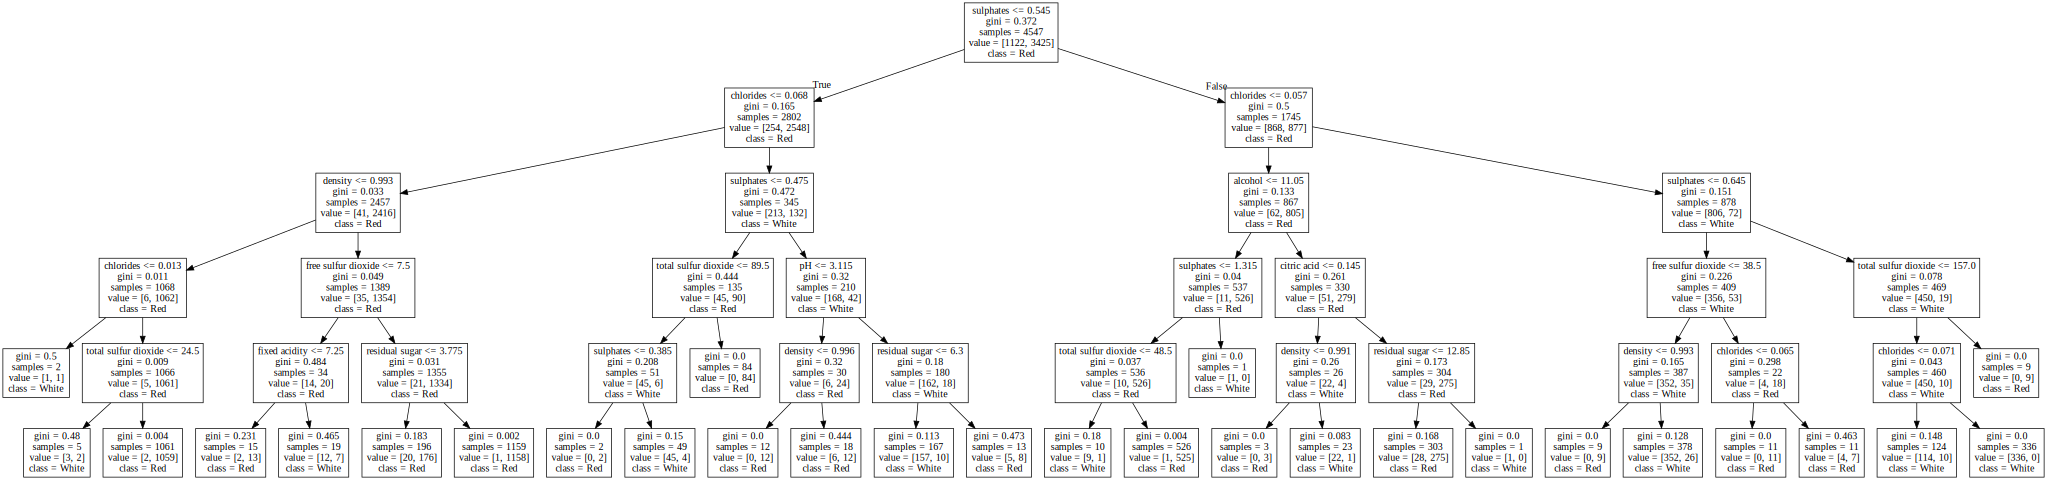

In [92]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=['White', 'Red'], feature_names= X_test.columns)) 

In [21]:
print(dt.predict([[2,0.8,0.35,8.5,0.02,67,161,0.9,3.05,0.56,11.1]]))

['white']


In [24]:
y_test.tail()

4294    white
3757    white
5954      red
4418    white
6182      red
Name: type, dtype: object

In [93]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,20):
    print (x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print (y_test.head(20))


The prediction:

white
white
white
white
white
white
white
red
white
red
white
white
red
white
white
white
white
white
white
white

The expectation:

3103    white
1419    white
4761    white
4690    white
4032    white
1297    white
1773    white
5584      red
561     white
5946      red
1891    white
2264    white
6485      red
217     white
230     white
2168    white
1400    white
4355    white
4697    white
4295    white
Name: type, dtype: object
